In [1]:
import numpy as np
import re, os
from sklearn.metrics import roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
from itertools import cycle

In [2]:
def get_mean_roc(data, label_column=0, score_column=1):
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    for i in range(len(data)):
        fpr, tpr, thresholds = roc_curve(data[i][:, label_column], data[i][:, score_column])
        tprs.append(np.interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    # 计算标准差
    std_auc = np.std(aucs)
    return mean_fpr, mean_tpr, std_auc, tprs

In [3]:
def read_pre_res(filepath):
    with open(filepath) as f:
        records = f.readlines()
        f.close()
        res = []
        for i in records:
            if 'fold ' in i:
                fold_res = []
                res.append(fold_res)
                continue
            fold_res.append(i.rstrip().split('\t') if i.rstrip() != '' else None)
    return np.array(res).astype(np.float64)

In [4]:
rscnn_oh = r'C:\Users\Lenovo\Desktop\毕业论文\Model\RSCNN\onehot_RSCNN\result_ind.txt'
bigru_oh = r'D:\jupyter\postgraduate_3\Result\News\onehot_2BiGRU32_\result_ind.txt'
rb_oh = r'D:\jupyter\postgraduate_3\Result\News\ResSUMO_GRU\result_ind.txt'
hdeepspre = r'D:\jupyter\postgraduate_3\Result\News\FINAL\result_ind.txt'

In [5]:
path = [rscnn_oh, bigru_oh, rb_oh, hdeepspre]

In [6]:
fprs = []
tprs = []
stds = []
TPRS = []
for p in path:
    predict_cv_res = read_pre_res(p)
    fpr, tpr, std, Tprs = get_mean_roc(predict_cv_res)
    fprs.append(fpr)
    tprs.append(tpr)
    stds.append(std)
    TPRS.append(Tprs)

In [7]:
code = ['$RSCNN_{OH}$','$BiGRU{OH}$','$RB_{OH}$','HDeepSPred']

In [8]:
output = r'D:\pycharm\DLKit\Data\final-AUC-Ind'

In [9]:
plt.rcParams['savefig.dpi'] = 600 #图片像素

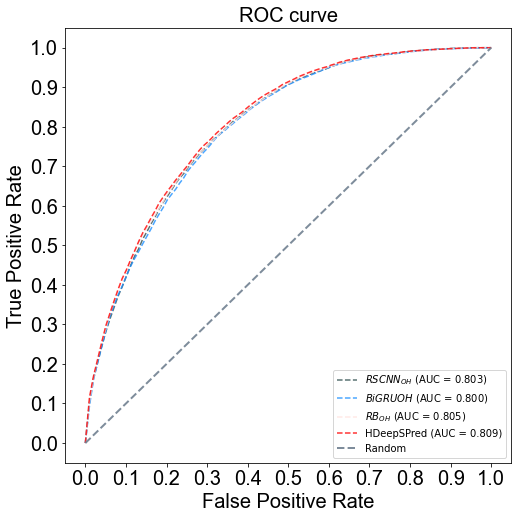

In [10]:
colors = cycle(['darkslategray','dodgerblue', 'mistyrose', 'red'])
fig = plt.figure(figsize=(8,8))
plt.title('ROC curve', fontdict={'family':'Arial','size' : 20})
for i, color in zip(range(len(fprs)), colors):
    mean_auc = auc(fprs[i], tprs[i])

    plt.plot(fprs[i], tprs[i], lw=1.5, alpha=0.8, color=color, linestyle= '--',
                 label='%s (AUC = %0.3f)' % (code[i], mean_auc))
    std_tpr = np.std(TPRS[i], axis=0)
    tprs_upper = np.minimum(tprs[i] + std_tpr, 1)
    tprs_lower = np.maximum(tprs[i] - std_tpr, 0)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='slategray',
         label='Random', alpha=.9)
plt.xticks(np.arange(0, 1.1, 0.1),fontproperties = 'Arial', size = 20)
plt.yticks(np.arange(0, 1.1, 0.1),fontproperties = 'Arial', size = 20)
plt.xlabel('False Positive Rate', fontdict={'family':'Arial','size' : 20})
plt.ylabel('True Positive Rate', fontdict={'family':'Arial','size' : 20})
plt.legend(loc="lower right")
plt.savefig(output)
plt.close(0)